In [1]:
pip install yfinance


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
df = yf.download(tickers=['AAPL'], period='5y')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-19,43.439999,43.8475,43.165001,43.200001,41.183464,139235200
1,2018-04-20,42.650002,42.8050,41.357498,41.430000,39.496086,261964400
2,2018-04-23,41.707500,41.7300,41.022499,41.310001,39.381702,146062000
3,2018-04-24,41.417500,41.5825,40.305000,40.735001,38.833534,134768000
4,2018-04-25,40.654999,41.3550,40.602501,40.912498,39.002747,113528400


In [5]:
df = df.drop([ 'Adj Close'], axis = 1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-04-19,43.439999,43.8475,43.165001,43.200001,139235200
1,2018-04-20,42.650002,42.8050,41.357498,41.430000,261964400
2,2018-04-23,41.707500,41.7300,41.022499,41.310001,146062000
3,2018-04-24,41.417500,41.5825,40.305000,40.735001,134768000
4,2018-04-25,40.654999,41.3550,40.602501,40.912498,113528400


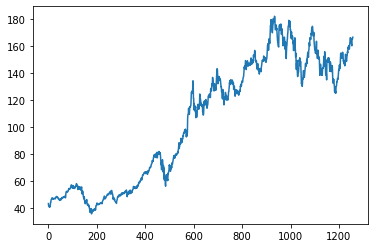

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()

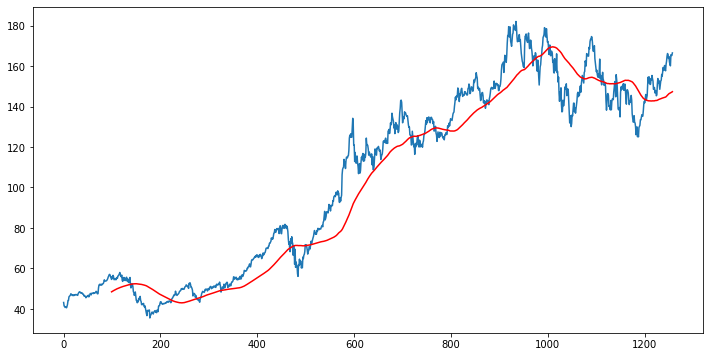

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r') 

In [9]:
ma200 = df.Close.rolling(200).mean()



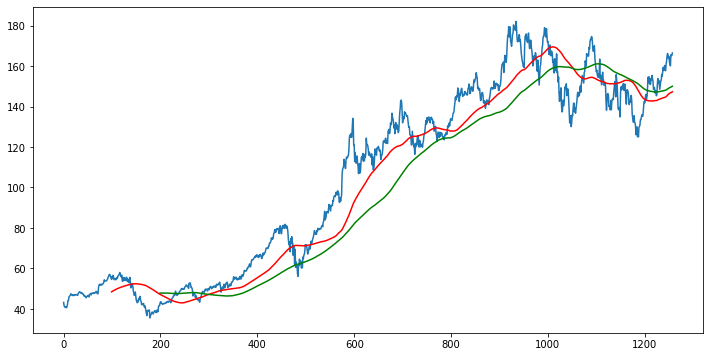

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r') 
plt.plot(ma200, 'g')

In [11]:
df.shape

(1258, 6)

In [12]:
#spliting for trainig and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [13]:
#size of training and testing data

print(data_training.shape)
print(data_testing.shape)

(880, 1)
(378, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.06316941],
       [0.04855851],
       [0.04756795],
       [0.04282147],
       [0.04428667],
       [0.04546298],
       [0.041542  ],
       [0.0476092 ],
       [0.05553378],
       [0.07094951],
       [0.07160987],
       [0.08593185],
       [0.08867656],
       [0.09051324],
       [0.09321666],
       [0.09874732],
       [0.09575499],
       [0.09484696],
       [0.09131807],
       [0.09490887],
       [0.09245311],
       [0.09104979],
       [0.09377386],
       [0.09280393],
       [0.09528035],
       [0.09484696],
       [0.09573436],
       [0.09433104],
       [0.09350558],
       [0.09220544],
       [0.09916008],
       [0.10244134],
       [0.10549558],
       [0.10687825],
       [0.10580515],
       [0.10217305],
       [0.10120311],
       [0.10336999],
       [0.10010936],
       [0.10031574],
       [0.09627091],
       [0.09606456],
       [0.08977031],
       [0.09144189],
       [0.08929567],
       [0.08818126],
       [0.08250613],
       [0.087

In [16]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
   x_train.append(data_training_array[i-100:i])
   y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

In [17]:
# ML MODEL

In [18]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error' )
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
25/25 [==============================] - 12s 252ms/step - loss: 0.1103
Epoch 2/50
25/25 [==============================] - 7s 284ms/step - loss: 0.0195
Epoch 3/50
25/25 [==============================] - 7s 278ms/step - loss: 0.0141
Epoch 4/50
25/25 [==============================] - 7s 274ms/step - loss: 0.0099
Epoch 5/50
25/25 [==============================] - 7s 274ms/step - loss: 0.0093
Epoch 6/50
25/25 [==============================] - 7s 274ms/step - loss: 0.0093
Epoch 7/50
25/25 [==============================] - 7s 272ms/step - loss: 0.0093
Epoch 8/50
25/25 [==============================] - 7s 276ms/step - loss: 0.0072
Epoch 9/50
25/25 [==============================] - 7s 275ms/step - loss: 0.0069
Epoch 10/50
25/25 [==============================] - 7s 275ms/step - loss: 0.0088
Epoch 11/50
25/25 [==============================] - 7s 275ms/step - loss: 0.0073
Epoch 12/50
25/25 [==============================] - 7s 276ms/step - loss: 0.0064
Epoch 13/50
25/25 [=====

In [23]:
model.save('Keras_model.h5')

In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-25-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [26]:
final_df.head()

,Close
0,126.900002
1,126.849998
2,125.279999
3,124.610001
4,124.279999


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05746538],
       [0.05661019],
       [0.02975882],
       [0.01829998],
       [0.01265603],
       [0.02599618],
       [0.        ],
       [0.04019153],
       [0.04036259],
       [0.05472887],
       [0.06139895],
       [0.04395416],
       [0.06516159],
       [0.11869327],
       [0.10432699],
       [0.11304932],
       [0.14109788],
       [0.1183514 ],
       [0.14982047],
       [0.17855303],
       [0.17376427],
       [0.16880458],
       [0.16367369],
       [0.19223532],
       [0.2187447 ],
       [0.22951954],
       [0.23482136],
       [0.2808279 ],
       [0.31605961],
       [0.35967178],
       [0.33692503],
       [0.36890717],
       [0.35847445],
       [0.37797162],
       [0.43800232],
       [0.42654348],
       [0.39079872],
       [0.32341368],
       [0.38669395],
       [0.37386686],
       [0.39781092],
       [0.42791174],
       [0.43526607],
       [0.39729786],
       [0.36668372],
       [0.37797162],
       [0.38173426],
       [0.375

In [28]:
input_data.shape

(478, 1)

In [29]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [30]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [31]:
#Making Predictions

y_predicted = model.predict(x_test)

12/12 [==============================] - 2s 92ms/step


In [32]:
y_predicted.shape

(378, 1)

In [33]:
y_test

array([0.36428934, 0.39353523, 0.43133224, 0.43988364, 0.44364627,
       0.43013519, 0.42927999, 0.44091003, 0.43287169, 0.49649409,
       0.44911929, 0.43475301, 0.45288193, 0.47802305, 0.46895859,
       0.47443135, 0.46006507, 0.46639302, 0.41696596, 0.41611077,
       0.45236886, 0.4525398 , 0.46964259, 0.51222863, 0.58713867,
       0.63297428, 0.64101261, 0.64768269, 0.65674715, 0.56900975,
       0.62767246, 0.71421253, 0.70514807, 0.68787409, 0.65503676,
       0.71455466, 0.81477676, 0.88147779, 0.87258427, 0.9562169 ,
       0.8927657 , 0.8686507 , 0.95365159, 0.8332478 , 0.81409276,
       0.79031989, 0.84573303, 0.89105531, 0.90200109, 0.97126744,
       0.95348039, 0.95501984, 0.93483841, 0.92406383, 1.        ,
       0.9604926 , 0.87874128, 0.82880117, 0.83170861, 0.83205074,
       0.88147779, 0.889174  , 0.83205074, 0.84710128, 0.79117508,
       0.730118  , 0.70070118, 0.66478548, 0.65127413, 0.61980506,
       0.61826587, 0.61022754, 0.80023954, 0.8763469 , 0.87343

In [34]:
y_predicted

array([[0.2934419 ],
       [0.28990036],
       [0.2896298 ],
       [0.29297125],
       [0.30027515],
       [0.31135112],
       [0.32565135],
       [0.34236243],
       [0.36064732],
       [0.37963778],
       [0.39894444],
       [0.41798022],
       [0.43605992],
       [0.45270196],
       [0.4677478 ],
       [0.48111936],
       [0.49283433],
       [0.50284684],
       [0.5111708 ],
       [0.51747835],
       [0.5215355 ],
       [0.52354693],
       [0.52388996],
       [0.5231203 ],
       [0.52206564],
       [0.52195275],
       [0.52386534],
       [0.52849984],
       [0.53604174],
       [0.5463573 ],
       [0.5585091 ],
       [0.57178545],
       [0.5859808 ],
       [0.60092974],
       [0.6163404 ],
       [0.63159794],
       [0.6464857 ],
       [0.66125727],
       [0.6763742 ],
       [0.6920874 ],
       [0.70871115],
       [0.72608674],
       [0.7437706 ],
       [0.7615787 ],
       [0.77873576],
       [0.79435694],
       [0.80760276],
       [0.818

In [35]:
scaler.scale_

array([0.01710279])

In [36]:
scale_factor = 1/0.01688049
y_predicted= y_predicted * scale_factor
y_test = y_test *scale_factor

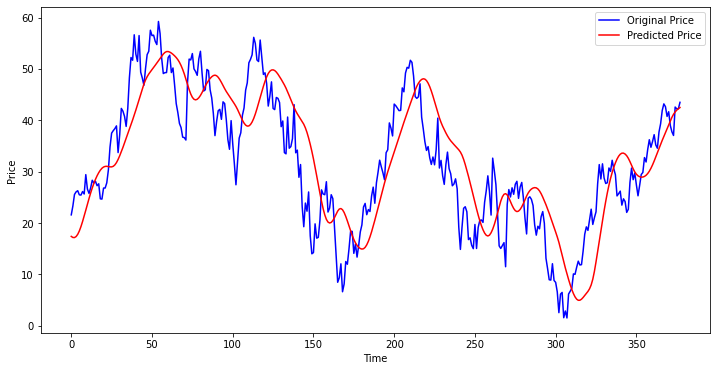

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()